In [23]:
%matplotlib inline

import numpy as np
import imageio
import matplotlib.pyplot as plt
import pandas as pd
import sklearn.datasets

In [3]:
data= sklearn.datasets.fetch_olivetti_faces()#de esta manera el dataset esta normalizado

downloading Olivetti faces from https://ndownloader.figshare.com/files/5976027 to C:\Users\Pedro\scikit_learn_data


(400, 4096)


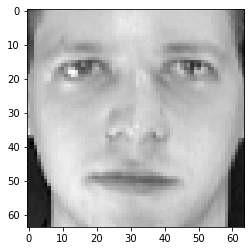

In [16]:
imagen_1 = data.data[0].reshape(64, 64)
imagen_2 = data.data[1].reshape(64, 64)
images= data.data
plt.imshow(data.data[0].reshape(64,64), cmap='gray')
print(images.shape)

In [8]:
print('Max original', end = ' ')
print(np.amax(imagen_1))
print('Min original', end = ' ')
print(np.amin(imagen_1))

Max original 0.8636364
Min original 0.02892562


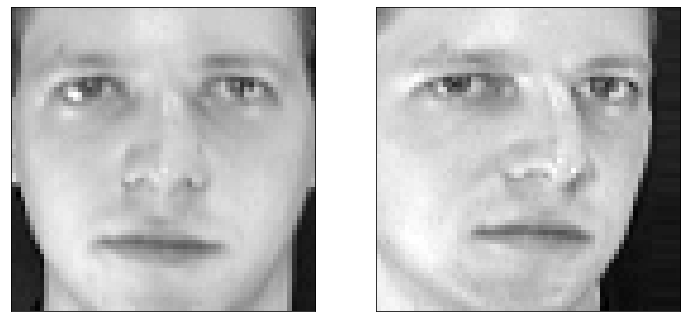

In [12]:
fix, ax = plt.subplots(1,2, figsize=(12,12),
                       subplot_kw = {'xticks': [], 'yticks': []})
ax[0].imshow(data.data[0].reshape(64,64),cmap = "gray")
ax[1].imshow(data.data[1].reshape(64,64),cmap = "gray")

In [61]:
####clase con tus propios datasets

im = imageio.imread("..\\imagenes\\imagenes\\imagenes\\s3\\3.pgm")
im = im.astype(np.uint8)
im_test=np.array(list(im.getdata(band=0)), float)
print(im)
print(im.shape)

AttributeError: 'Array' object has no attribute 'getdata'

In [35]:

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 204
Min original 10


In [36]:

im_original = im

im = im / 255

print('Max original', end = ' ')
print(np.amax(im))
print('Min original', end = ' ')
print(np.amin(im))

Max original 0.8
Min original 0.0392156862745098


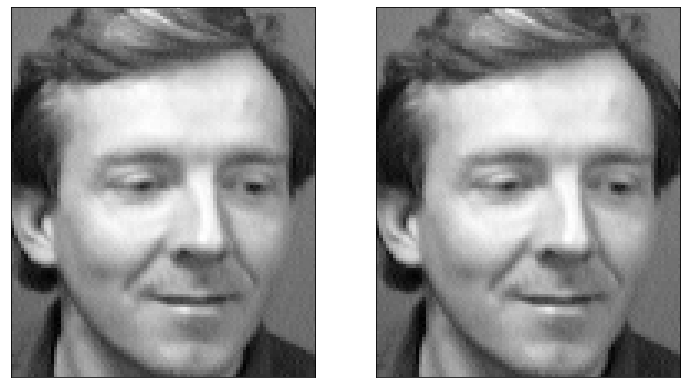

In [37]:

fix, ax = plt.subplots(1, 2, figsize=(12,12),
                       subplot_kw = {'xticks' : [], 'yticks':[]})

ax[0].imshow(im_original, cmap = "gray")
ax[1].imshow(im, cmap = "gray")

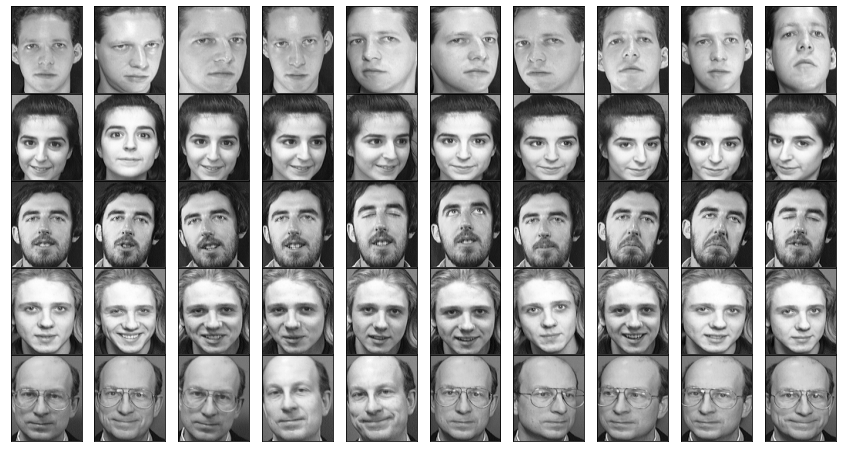

In [46]:
from glob import iglob

caras = pd.DataFrame([])

for path in iglob('..\\imagenes\\imagenes\\imagenes\\*\*.pgm'):
    im = imageio.imread(path)
    cara = pd.Series(im.flatten(), name = path)#flatten()
    caras = caras.append(cara)
    
fig, axes = plt.subplots(5,10, figsize=(15,8),
                       subplot_kw = {'xticks': [], 'yticks': []},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))
for i, ax in enumerate(axes.flat):
    ax.imshow(caras.iloc[i].values.reshape(112,92), cmap = "gray")

In [47]:
from sklearn.decomposition import PCA


PCA(n_components=0.99)

In [53]:
caras_pca = PCA(n_components = 0.5)

caras_pca.fit(caras)

PCA(n_components=0.5)

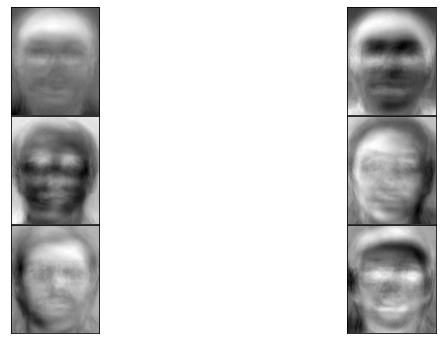

In [54]:
filas = 3
columnas = caras_pca.n_components_ // filas

fig, axes = plt.subplots(filas, columnas, figsize=(12, 6),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(caras_pca.components_[i].reshape(112,92), cmap = "gray")

In [55]:
print(caras_pca.n_components_)

6


In [56]:
componentes = caras_pca.transform(caras)
proyeccion = caras_pca.inverse_transform(componentes)

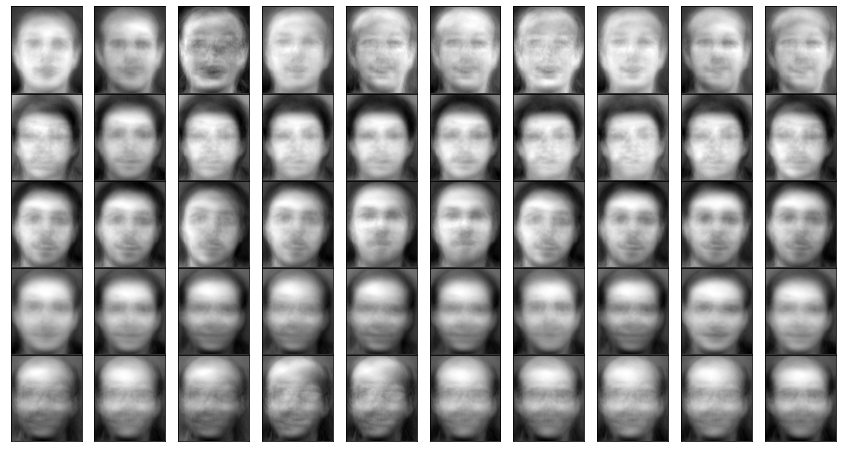

In [59]:

fig, axes = plt.subplots(5, 10, figsize=(15, 8),
                       subplot_kw = {'xticks' : [], 'yticks':[]},
                        gridspec_kw = dict(hspace = 0.01, wspace = 0.01))

for i, ax in enumerate(axes.flat):
    ax.imshow(proyeccion[i].reshape(112,92), cmap = "gray")